In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configuración de gráficos
sns.set_style("whitegrid") 
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# 2. Cargar el dataset
# Ruta relativa al archivo CSV
data_path = os.path.join("..", "data_sintetica", "clientes_tienda_virtual.csv")

# Cargar los datos
df = pd.read_csv(data_path)

# Vista previa
df.head()

,ID_Cliente,grupo_edad,region,nivel_ingresos,horas_conectado,clics_en_productos,uso_cupones,compra_realizada,total_compra
0,CL00001,46-60,Cajamarca,bajo,1.80,5,3,1,232.01
1,CL00002,60+,Moquegua,medio,3.19,8,1,0,0.00
2,CL00003,36-45,Tumbes,alto,4.03,3,4,1,999.68
3,CL00004,60+,Arequipa,medio,3.43,6,2,0,0.00
4,CL00005,60+,Ayacucho,bajo,1.21,5,2,0,0.00


In [3]:
# 3. Información general del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          15000 non-null  object 
 1   grupo_edad          15000 non-null  object 
 2   region              15000 non-null  object 
 3   nivel_ingresos      15000 non-null  object 
 4   horas_conectado     15000 non-null  float64
 5   clics_en_productos  15000 non-null  int64  
 6   uso_cupones         15000 non-null  int64  
 7   compra_realizada    15000 non-null  int64  
 8   total_compra        15000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


,horas_conectado,clics_en_productos,uso_cupones,compra_realizada,total_compra
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2.501141,5.007267,2.006667,0.475867,368.811468
std,0.991780,2.228530,1.412169,0.499434,488.037228
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.810000,3.000000,1.000000,0.000000,0.000000
50%,2.490000,5.000000,2.000000,0.000000,0.000000
75%,3.180000,6.000000,3.000000,1.000000,694.162500
max,6.800000,20.000000,4.000000,1.000000,1999.840000


In [4]:
# 4. Valores nulos y duplicados
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

C:\Users\Asus\AppData\Local\Temp\ipykernel_3284\2110589735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grupo_edad', data=df, palette='Blues')


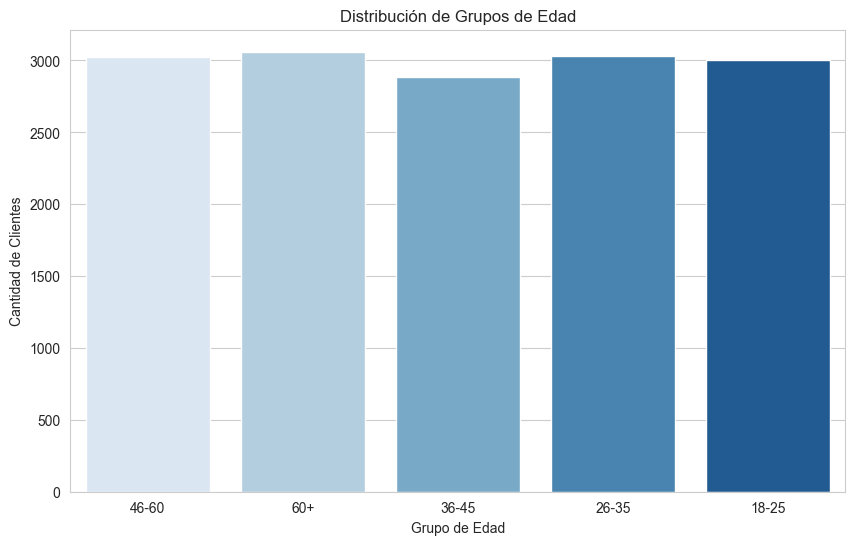

C:\Users\Asus\AppData\Local\Temp\ipykernel_3284\2110589735.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nivel_ingresos', data=df, palette='Greens')


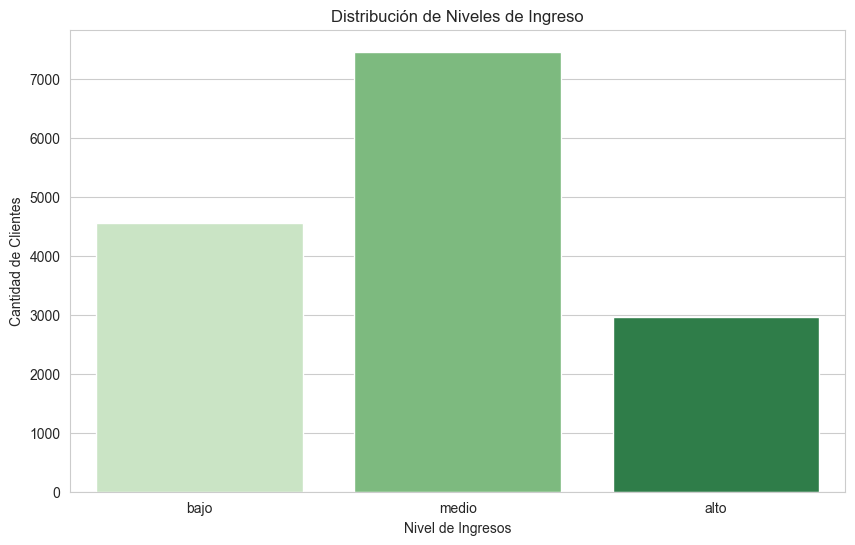

In [5]:
# 5. Distribución de variables

# Grupo edad
sns.countplot(x='grupo_edad', data=df, palette='Blues')
plt.title("Distribución de Grupos de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Nivel de ingresos (categórica)
sns.countplot(x='nivel_ingresos', data=df, palette='Greens')
plt.title("Distribución de Niveles de Ingreso")
plt.xlabel("Nivel de Ingresos")
plt.ylabel("Cantidad de Clientes")
plt.show()

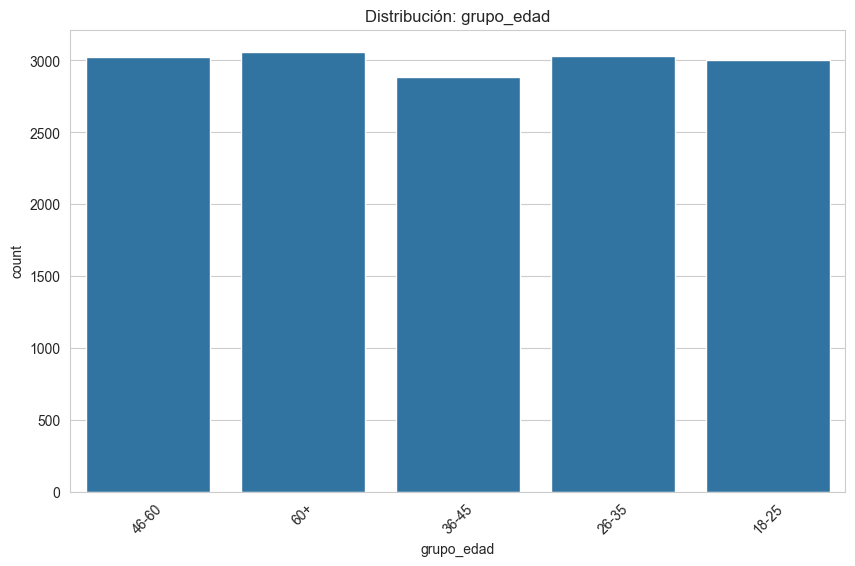

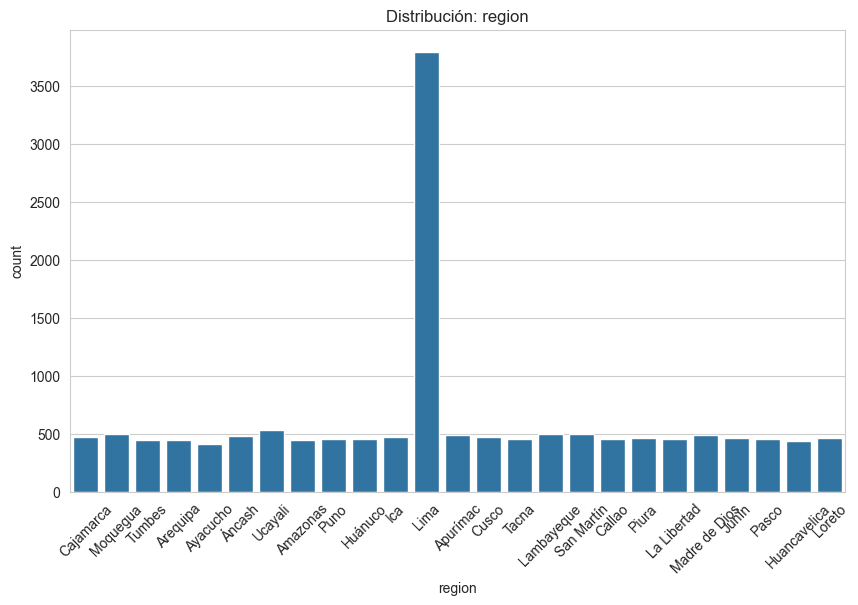

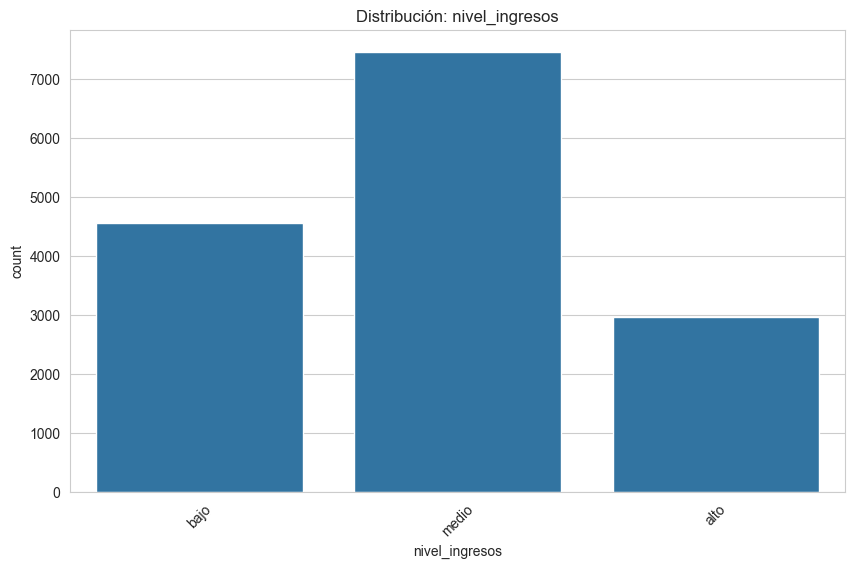

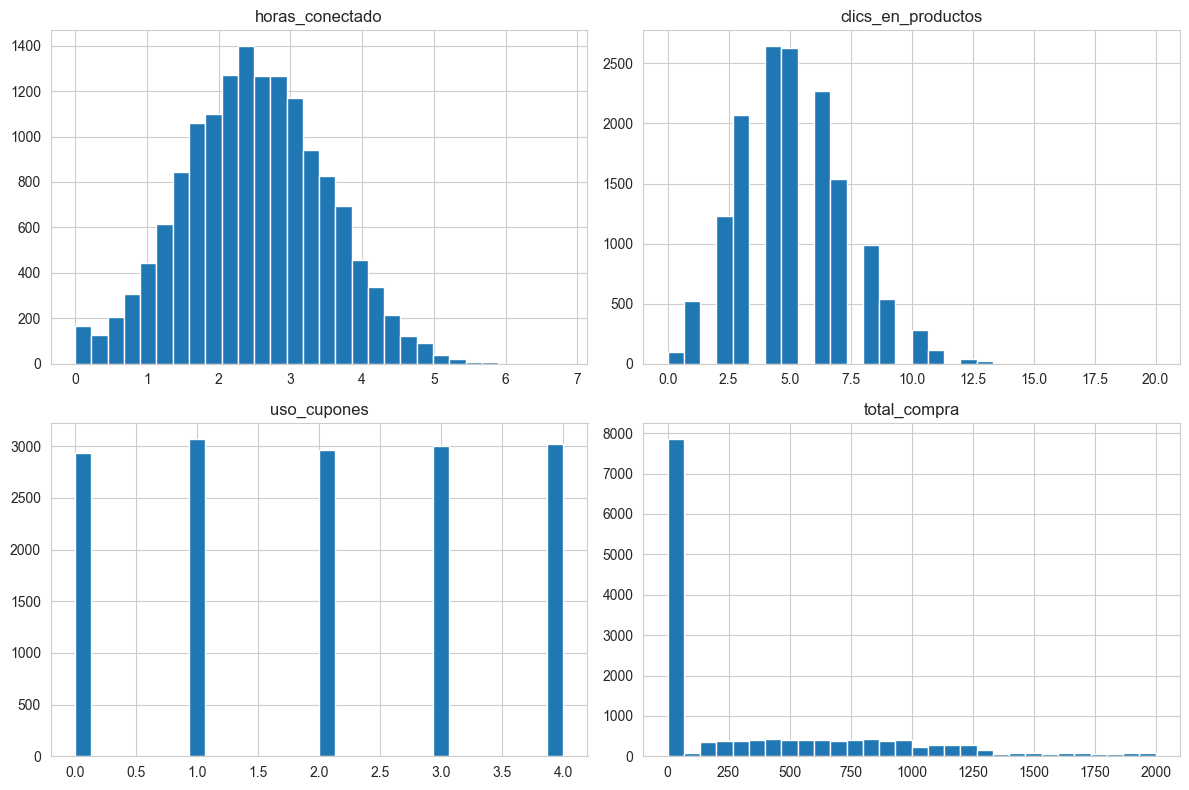

In [6]:
# 6. Análisis univariado (una variable a la vez)

# Variables categóricas
cat_vars = ['grupo_edad', 'region', 'nivel_ingresos']
for col in cat_vars:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribución: {col}")
    plt.show()

# Variables numéricas
num_vars = ['horas_conectado', 'clics_en_productos', 'uso_cupones', 'total_compra']
df[num_vars].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3284\1451849830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra_realizada', data=df, palette='Set2')


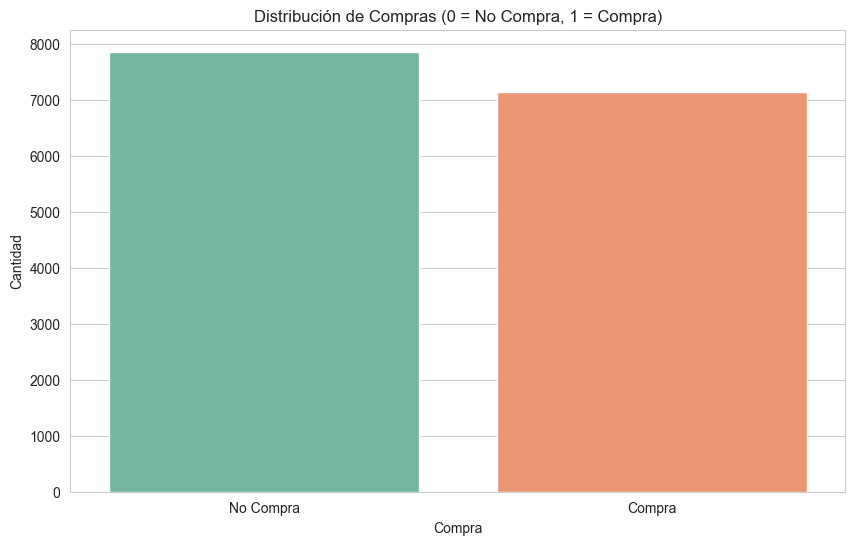

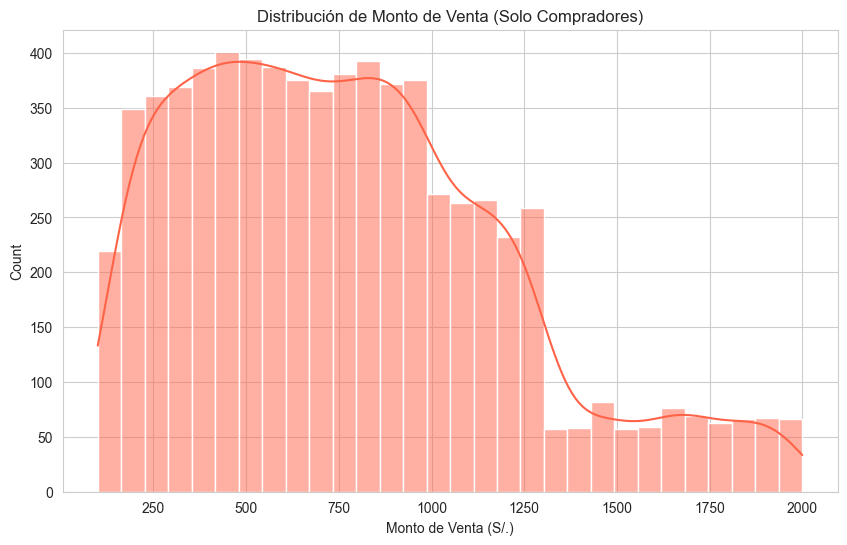

In [7]:
# 7. Distribución de comportamiento del cliente
# Compra
sns.countplot(x='compra_realizada', data=df, palette='Set2')
plt.title("Distribución de Compras (0 = No Compra, 1 = Compra)")
plt.xlabel("Compra")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ['No Compra', 'Compra'])
plt.show()

# Monto de venta (solo donde compra = 1)
sns.histplot(df[df['compra_realizada'] == 1]['total_compra'], bins=30, kde=True, color='tomato')
plt.title("Distribución de Monto de Venta (Solo Compradores)")
plt.xlabel("Monto de Venta (S/.)")
plt.show()

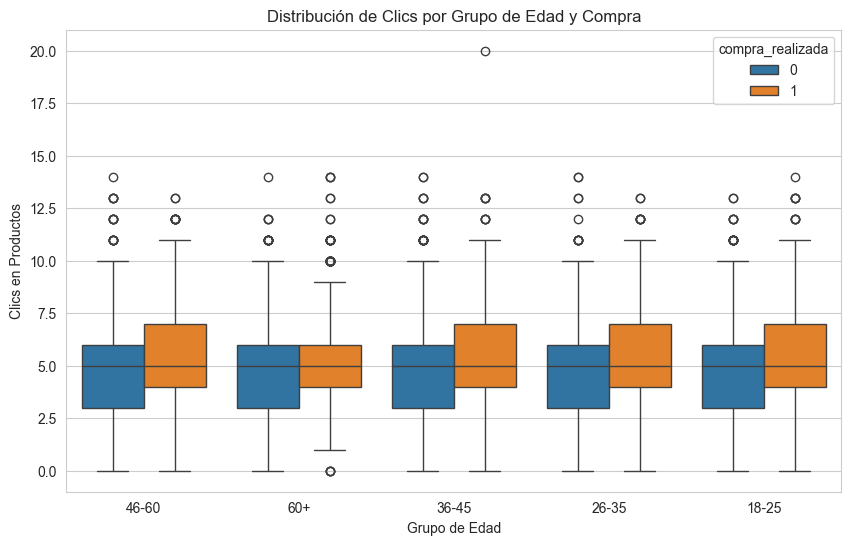

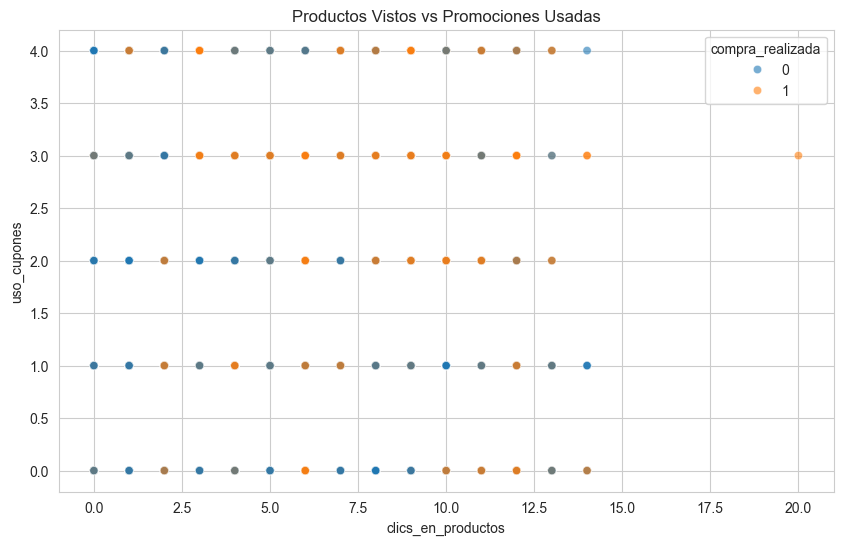

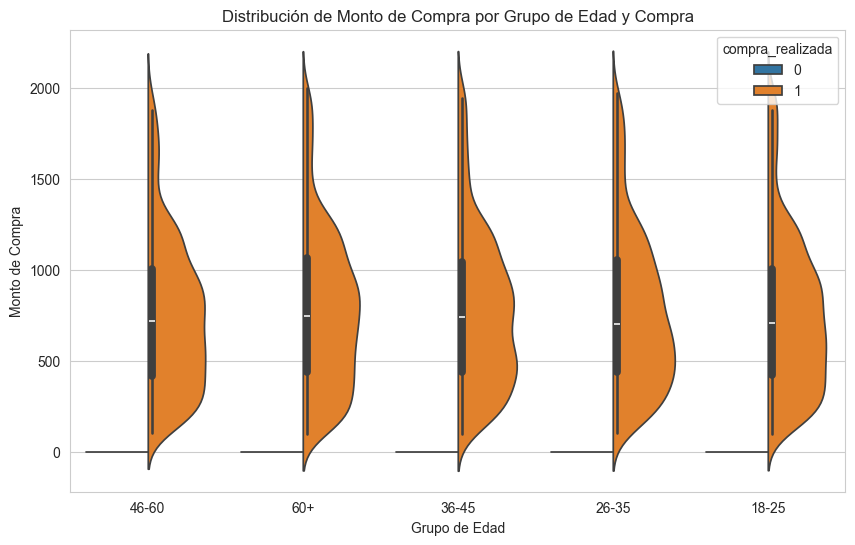

In [8]:
# 8. Relaciones entre variables

# Edad vs productos vistos
sns.boxplot(data=df, x='grupo_edad', y='clics_en_productos', hue='compra_realizada')
plt.title("Distribución de Clics por Grupo de Edad y Compra")
plt.xlabel("Grupo de Edad")
plt.ylabel("Clics en Productos")
plt.show()

# Productos vistos vs promociones usadas
sns.scatterplot(data=df, x='clics_en_productos', y='uso_cupones', hue='compra_realizada', alpha=0.6)
plt.title("Productos Vistos vs Promociones Usadas")
plt.show()

# Distribución de montos por grupo de edad y compra
sns.violinplot(data=df, x='grupo_edad', y='total_compra', hue='compra_realizada', split=True)
plt.title("Distribución de Monto de Compra por Grupo de Edad y Compra")
plt.xlabel("Grupo de Edad")
plt.ylabel("Monto de Compra")
plt.show()

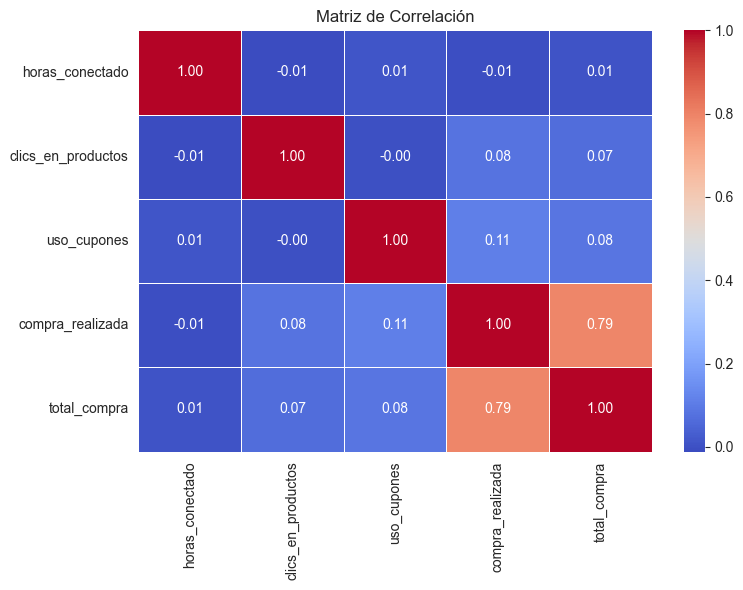

In [9]:
# 9. Matriz de correlación

# Seleccionar únicamente columnas numéricas
corr = df.select_dtypes(include=['number']).corr()

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

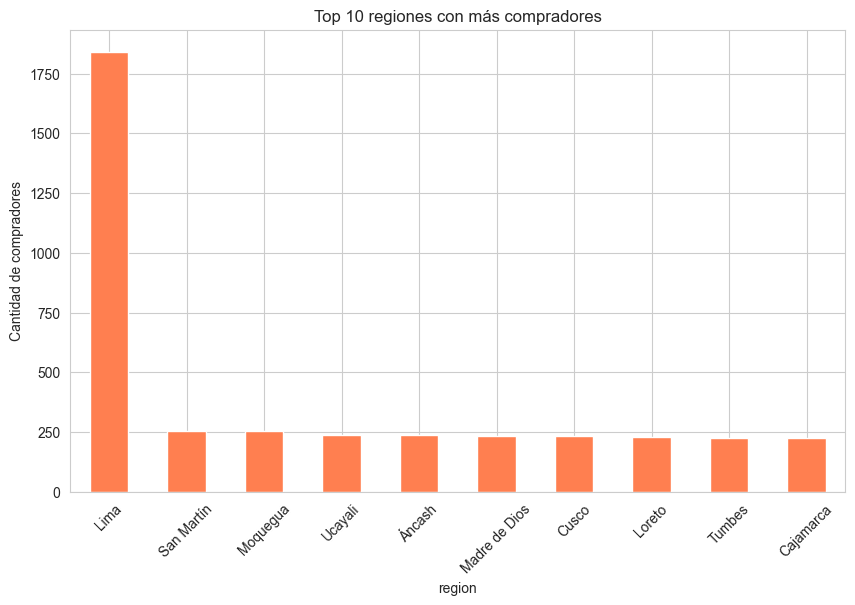

In [10]:
# 10. Análisis de las regiones con más compradores
top_regiones = df[df['compra_realizada'] == 1]['region'].value_counts().head(10)
top_regiones.plot(kind='bar', color='coral')
plt.title("Top 10 regiones con más compradores")
plt.ylabel("Cantidad de compradores")
plt.xticks(rotation=45)
plt.show()

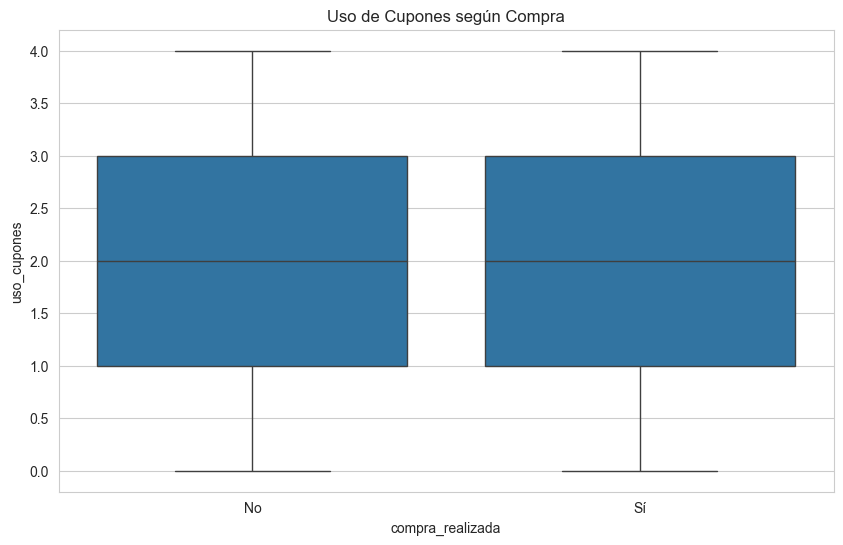

In [11]:
# 11. Distribución de cupones según compra

sns.boxplot(x='compra_realizada', y='uso_cupones', data=df)
plt.title("Uso de Cupones según Compra")
plt.xticks([0,1], ['No', 'Sí'])
plt.show()